In [ ]:
from google.colab import files

uploaded_train = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df = df.drop(['id'], axis = 1)
#df = df.drop(['cholesterol'], axis = 1)
#df = df.drop(['gluc'], axis = 1)
#df = df.drop(['ap_hi'], axis = 1)
#df = df.drop(['ap_lo'], axis = 1)

In [ ]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df['target'] = df['cardio']
df = df.drop('cardio', axis = 1)

In [ ]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.isna().sum()
df.duplicated().sum()

24

In [ ]:
#Removing duplicate rows
df = df.drop_duplicates()
df.duplicated().sum()
df.shape

(69976, 12)

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),
                  columns=['age','gender','height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alcohol', 'active', 'target'])


In [ ]:
df_scaled.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol,active,target
count,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04,6.997600e+04
mean,5.889254e-16,-3.260761e-15,-4.882897e-16,1.651135e-16,-3.161739e-16,3.435550e-16,-4.093857e-15,-8.715566e-16,-9.839109e-16,-1.932633e-16,-3.232024e-16,-2.619121e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.514267e+00,-7.332325e-01,-1.331836e+01,-4.459821e+00,-1.810092e+00,-8.839968e-01,-5.394415e-01,-3.957984e-01,-3.109376e-01,-2.384276e-01,-2.023542e+00,-9.995428e-01
25%,-7.315318e-01,-7.332325e-01,-6.526669e-01,-6.396089e-01,-5.726205e-02,-8.825451e-02,-5.394415e-01,-3.957984e-01,-3.109376e-01,-2.384276e-01,4.941830e-01,-9.995428e-01
50%,9.485854e-02,-7.332325e-01,7.804602e-02,-1.534002e-01,-5.726205e-02,-8.825451e-02,-5.394415e-01,-3.957984e-01,-3.109376e-01,-2.384276e-01,4.941830e-01,-9.995428e-01
75%,7.530527e-01,1.363824e+00,6.869734e-01,5.411838e-01,7.257720e-02,-3.520502e-02,9.304373e-01,-3.957984e-01,-3.109376e-01,-2.384276e-01,4.941830e-01,1.000457e+00
max,1.720079e+00,1.363824e+00,1.042981e+01,8.737274e+00,1.031649e+02,5.784179e+01,2.400316e+00,3.098573e+00,3.216080e+00,4.194146e+00,4.941830e-01,1.000457e+00


In [ ]:
df_scaled = df_scaled.drop('target', axis = 1)

In [ ]:
X = df_scaled
y = df.iloc[:, -1:]

X = X.drop("gluc")

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol,active
0,-0.436074,1.363824,0.443402,-0.847984,-0.122182,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
1,0.307637,-0.733233,-1.018023,0.749559,0.072577,-0.035205,2.400316,-0.395798,-0.310938,-0.238428,0.494183
2,-0.248018,-0.733233,0.078046,-0.709067,0.007658,-0.141304,2.400316,-0.395798,-0.310938,-0.238428,-2.023542
3,-0.748149,1.363824,0.565188,0.541184,0.137497,0.017844,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
4,-0.808537,-0.733233,-1.018023,-1.264734,-0.187101,-0.194353,-0.539441,-0.395798,-0.310938,-0.238428,-2.023542
...,...,...,...,...,...,...,...,...,...,...,...
69971,-0.092792,1.363824,0.443402,0.124433,-0.057262,-0.088255,-0.539441,-0.395798,3.216080,-0.238428,0.494183
69972,1.269395,-0.733233,-0.774452,3.597353,0.072577,-0.035205,0.930437,1.351387,-0.310938,-0.238428,0.494183
69973,-0.163312,1.363824,2.270185,2.138727,0.332256,-0.035205,2.400316,-0.395798,-0.310938,4.194146,-2.023542
69974,1.200495,-0.733233,-0.165525,-0.153400,0.040117,-0.088255,-0.539441,1.351387,-0.310938,-0.238428,-2.023542


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.value_counts())

(55980, 11)
(13996, 11)
(55980, 1)
target
1         7060
0         6936
dtype: int64


In [ ]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alcohol,active
1262,-2.028466,-0.733233,-0.652667,1.166309,-0.057262,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
19400,-1.056171,1.363824,0.199831,-0.570151,-0.057262,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,-2.023542
36258,0.341681,-0.733233,-1.018023,-1.125818,-0.057262,-0.194353,-0.539441,-0.395798,-0.310938,-0.238428,0.494183
65585,0.636734,-0.733233,-1.018023,-0.153400,-0.057262,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,-2.023542
51217,0.645245,-0.733233,-1.261594,1.096851,-0.057262,-0.088255,-0.539441,-0.395798,-0.310938,-0.238428,0.494183


In [ ]:
y_train.shape[1]

1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers   
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(512, activation = "linear", input_dim = X_train.shape[1]))
model.add(Dense(512, activation = "linear"))
model.add(Dense(512, activation = "linear"))
model.add(Dense(16, activation = "linear"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 10), loss = "binary_crossentropy", metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               6144      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 16)                8208      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 539,681
Trainable params: 539,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 256)

In [ ]:
model_2 = Sequential()

model_2.add(Dense(256, activation = "relu", input_dim = X_train.shape[1]))
model_2.add(Dense(256, activation = "relu"))
model_2.add(Dense(256, activation = "relu"))
model_2.add(Dense(1, activation = "sigmoid"))

model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), loss = "binary_crossentropy", metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])
model_2.summary()

history_2 = model_2.fit(X_train, y_train, epochs = 50, batch_size = 128)

In [ ]:
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation='relu', input_dim = X_train.shape[1]),
  layers.Dropout(.1),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model_3.compile(optimizer='adam', loss= "binary_crossentropy", metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])

history_3 = model_3.fit(X_train, y_train, epochs = 100, batch_size = 128)

In [ ]:
model_4 = Sequential()

model_4.add(Dense(256, activation = "relu", input_dim = X_train.shape[1]))
model_4.add(Dense(256, activation = "relu"))
model_4.add(Dense(256, activation = "relu"))
model_4.add(Dense(1, activation = "sigmoid"))

model_4.compile(optimizer = tf.keras.optimizers.Adam(), loss = "binary_crossentropy", metrics = [tf.keras.metrics.BinaryAccuracy(threshold=0.5)])
model_4.summary()

history_4 = model_4.fit(X_train, y_train, epochs = 20, batch_size = 128)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 256)               3072      
                                                                 
 dense_59 (Dense)            (None, 256)               65792     
                                                                 
 dense_60 (Dense)            (None, 256)               65792     
                                                                 
 dense_61 (Dense)            (None, 1)                 257       
                                                                 
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
438/438 [==============================] - 4s 7ms/step - loss: 0.5878 - binary_accuracy: 0.7033
Epoch 2/20
438/438 [==============================] - 3s 7ms/step - loss

## Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.615610244670196

# Using RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np

np.random.seed(7)
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_RFC.score(X_test, y_test)

0.7193483852529294

# Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_LR.score(X_test, y_test)

0.7202772220634467

# Using DT

In [ ]:
from sklearn import tree

In [ ]:
model_dt = tree.DecisionTreeClassifier()

model_dt.fit(X_train, y_train)

model_dt.score(X_test, y_test)

0.6336096027436411

In [ ]:
y_test.value_counts()

target
1         7060
0         6936
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm  = confusion_matrix(y_test, y_pred)

cm

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# ANN Cont...

In [ ]:
prediction = model_4.predict(X_test)
np.rint(prediction).astype(int)
#prediction = tf.cast(prediction, tf.int32)

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
prediction

array([[0.8376084 ],
       [0.13632923],
       [0.3381554 ],
       ...,
       [0.7812508 ],
       [0.8748946 ],
       [0.36365953]], dtype=float32)

In [ ]:
y_predict = pd.DataFrame(np.rint(prediction).astype(int), columns = ['prediction'])
y_predict.value_counts()

prediction
0             7778
1             6218
dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7329236924835667

In [ ]:
model_4_df = pd.DataFrame(history_4.history)
model_4_df.head()

,loss,binary_accuracy
0,0.587832,0.703340
1,0.550373,0.730189
2,0.547140,0.732690
3,0.544150,0.733530
4,0.542819,0.735048


In [ ]:
import matplotlib.pyplot as plt
plot_4 = model_4_df[['binary_accuracy']].plot()
plot_4.set_ylim([0.7,0.75])


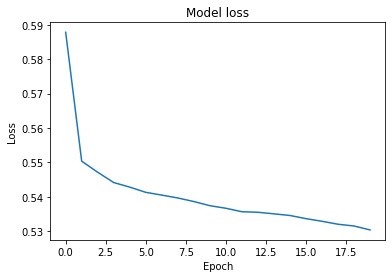

In [ ]:
plt.plot(history_4.history["loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
!pip install tensorflowjs

import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_4, 'model_4')